In [2]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from scipy import stats

from sklearn import preprocessing

%matplotlib inline

from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error

from scipy.optimize import minimize
import statsmodels.tsa.api as smt
import statsmodels.api as sm

from tqdm import tqdm_notebook

from itertools import product

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

import warnings
warnings.filterwarnings('ignore')

sns.set(color_codes=True)

In [3]:
All = pd.read_csv("All.csv",index_col=0)
All_named = pd.read_csv("All_named_columns.csv",index_col=0)

# All.Date_date = pd.to_datetime(All.Date_date)
# All_named.Date_date = pd.to_datetime(All_named.Date_date)

In [4]:
print(All.columns)
print(All_named.columns)

Index(['company_name', 'Open', 'Open_diff', 'High', 'Low', 'Close',
       'Close_diff', 'Adj_Close', 'Adj_Close_diff', 'Volume', 'Volume_diff',
       'day_of_week', 'company_Google_trends', 'Covid_19', 'Pandemic',
       'presidential_election', 'Lockdown', 'Face_masks', 'Coronavirus',
       'Quarantine', 'EDD', 'sba_loans', 'unemployment_check', 'swine_flu',
       'flu', 'zika', 'Date_date'],
      dtype='object')
Index(['Intel_Open', 'Intel_Open_diff', 'Intel_High', 'Intel_Low',
       'Intel_Close', 'Intel_Close_diff', 'Intel_Adj_Close',
       'Intel_Adj_Close_diff', 'Intel_Volume', 'Intel_Volume_diff',
       ...
       'Lockdown', 'Face masks', 'Coronavirus', 'Quarantine', 'EDD',
       'sba loans', 'unemployment check', 'swine flu', 'flu', 'zika'],
      dtype='object', length=343)


In [5]:
# All_named
# All_named = All_named.reset_index()
# All_named['index'] = pd.to_datetime(All_named['index'])


# All_named

# Date_date

In [6]:

All_named = All_named.reset_index()
All_named['index'] = pd.to_datetime(All_named['index'])
All_named['Date_date']=All_named['index'].apply(lambda x:x.date())
All_named = All_named.set_index('index')
All_named.index = pd.to_datetime(All_named.index)
All.index = pd.to_datetime(All.index)

In [7]:
All.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 102150 entries, 2011-01-03 to 2020-04-29
Data columns (total 27 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   company_name           101649 non-null  object 
 1   Open                   101649 non-null  float64
 2   Open_diff              101619 non-null  float64
 3   High                   101649 non-null  float64
 4   Low                    101649 non-null  float64
 5   Close                  101649 non-null  float64
 6   Close_diff             101619 non-null  float64
 7   Adj_Close              101649 non-null  float64
 8   Adj_Close_diff         101619 non-null  float64
 9   Volume                 101649 non-null  float64
 10  Volume_diff            101619 non-null  float64
 11  day_of_week            101649 non-null  object 
 12  company_Google_trends  102150 non-null  float64
 13  Covid_19               102150 non-null  float64
 14  Pandemic            

In [8]:
All_named.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3405 entries, 2011-01-03 to 2020-04-29
Columns: 344 entries, Intel_Open to Date_date
dtypes: float64(343), object(1)
memory usage: 9.0+ MB


In [9]:
All.columns

Index(['company_name', 'Open', 'Open_diff', 'High', 'Low', 'Close',
       'Close_diff', 'Adj_Close', 'Adj_Close_diff', 'Volume', 'Volume_diff',
       'day_of_week', 'company_Google_trends', 'Covid_19', 'Pandemic',
       'presidential_election', 'Lockdown', 'Face_masks', 'Coronavirus',
       'Quarantine', 'EDD', 'sba_loans', 'unemployment_check', 'swine_flu',
       'flu', 'zika', 'Date_date'],
      dtype='object')

In [10]:
All_named.columns

Index(['Intel_Open', 'Intel_Open_diff', 'Intel_High', 'Intel_Low',
       'Intel_Close', 'Intel_Close_diff', 'Intel_Adj_Close',
       'Intel_Adj_Close_diff', 'Intel_Volume', 'Intel_Volume_diff',
       ...
       'Face masks', 'Coronavirus', 'Quarantine', 'EDD', 'sba loans',
       'unemployment check', 'swine flu', 'flu', 'zika', 'Date_date'],
      dtype='object', length=344)

In [11]:
All_named
All_named = All_named['2011-01-04':'2020-04-30']

In [12]:
# All = All.reset_index()
# All_named = All_named.reset_index()

In [13]:
# All.index = pd.to_datetime(All.index)
# All_named.index = pd.to_datetime(All_named.index)
All

All = All['2011-01-04':'2020-04-30']

In [14]:
# slicing for time windows
All_Covid19 = All['2020-01-01':'2020-04-30']
# Apple_Flu = Apple_std['2009-01-01':'2010-08-30']
All_Zika = All['2015-01-01':'2016-01-01']
All_election_2016 = All['2016-06-01':'2017-05-30']
All_election_2012 = All['2012-06-01':'2013-05-30']



All_named_Covid19 = All_named['2020-01-01':'2020-04-30']
# Apple_Flu = Apple_std['2009-01-01':'2010-08-30']
All_named_Zika = All_named['2015-01-01':'2016-01-01']
All_named_election_2016 = All_named['2016-06-01':'2017-05-30']
All_named_election_2012 = All_named['2012-06-01':'2013-05-30']

test = All['2020-01-01':'2020-04-30']

# resampling


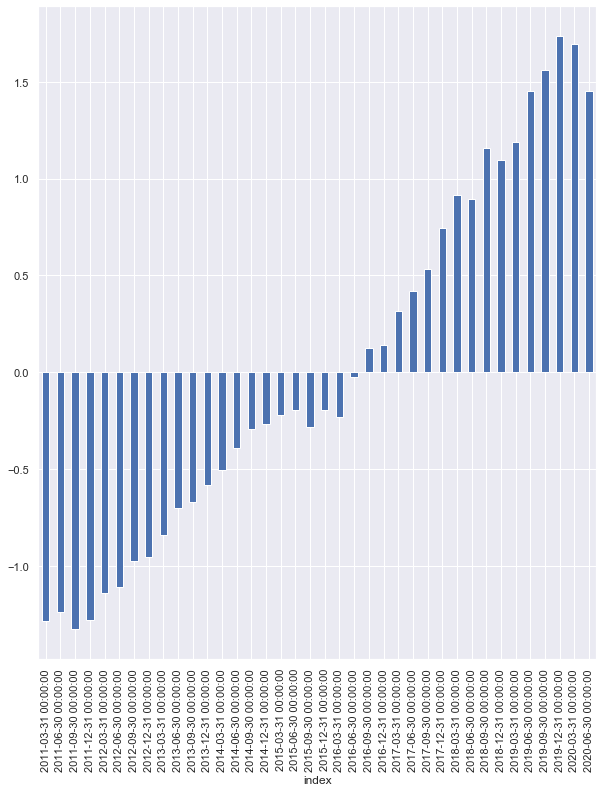

In [15]:
A = All.resample(rule='Q').mean()
# All.resample(rule='Q').mean()
A['Adj_Close'].plot(kind='bar', figsize=(10,12))




In [14]:
# 이게 좋다!!!

All_Year=All.groupby(['company_name']).resample(rule='A').mean()
All_Quater=All.groupby(['company_name']).resample(rule='Q').mean()
All_Month=All.groupby(['company_name']).resample(rule='M').mean()

All_Year_Apple = All_Year.xs('Apple', level='company_name')
All_Quater_Apple = All_Quater.xs('Apple', level='company_name')
All_Month_Apple = All_Month.xs('Apple', level='company_name')

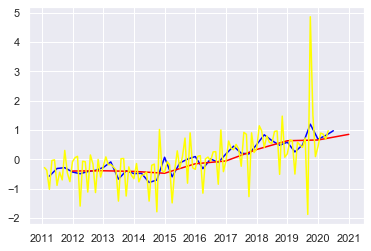

In [15]:
plt.plot('company_Google_trends',data=All_Quater_Apple, color='blue')
plt.plot('company_Google_trends',data=All_Year_Apple, color='red')
plt.plot('company_Google_trends',data=All_Month_Apple, color='yellow')

In [16]:
Apple = All[(All['company_name'] == 'Apple')]

In [17]:
Apple

Apple.Date_date = pd.to_datetime(Apple.Date_date)

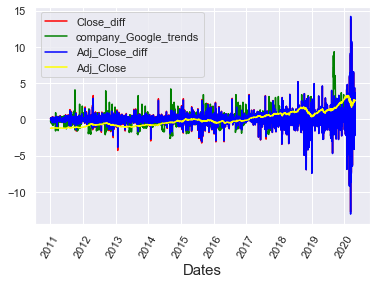

In [18]:
plt.plot('Date_date', 'Close_diff', data=Apple, color='red')
plt.plot('Date_date', 'company_Google_trends', data=Apple, color='green')
plt.plot('Date_date', 'Adj_Close_diff', data=Apple, color='blue')
plt.plot('Date_date', 'Adj_Close', data=Apple, color='yellow')



plt.xticks(rotation=60)
plt.xlabel('Dates',fontsize=15)
plt.legend()
plt.show()

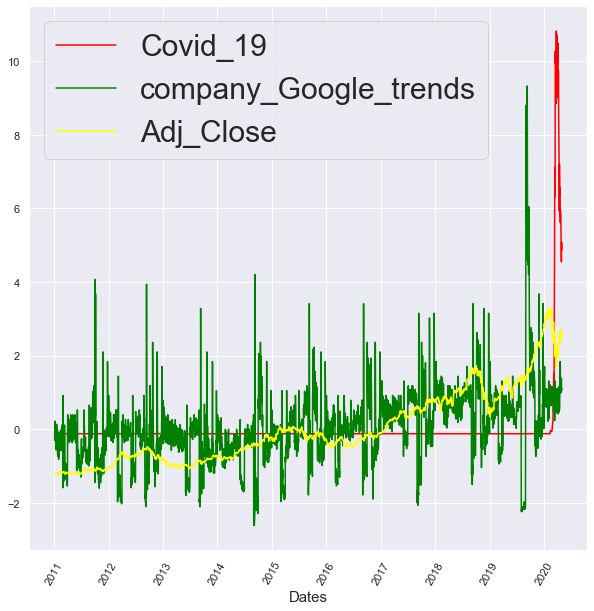

In [19]:
plt.figure(figsize=(10,10))
plt.plot('Date_date', 'Covid_19', data=Apple, color='red')
plt.plot('Date_date', 'company_Google_trends', data=Apple, color='green')
# plt.plot('Date_date', 'Adj_Close_diff', data=Apple_std_date, color='blue')
plt.plot('Date_date', 'Adj_Close', data=Apple, color='yellow')



plt.xticks(rotation=60)
plt.xlabel('Dates',fontsize=15)
plt.legend(fontsize=30)
plt.show()

In [20]:
#checking redundancies in attributes and/or tuples.
pcorr = All_named.corr(method='pearson')

## Set the maximum number of columns as "None" to display all columns
pd.set_option('display.max_columns', None)
# pcorr
plt.figure(figsize=(200,200))
sns.heatmap(pcorr, annot=True, cmap=plt.cm.Reds)
plt.show()

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7ff691069290> (for post_execute):


KeyboardInterrupt: 

In [90]:
def top_correlation (df):
    corr_matrix = df.corr()
    correlation = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=False))
    correlation = pd.DataFrame(correlation).reset_index()
    correlation.columns=["Variable_1","Variable_2","Correlacion"]
    correlation = correlation.reindex(correlation.Correlacion.abs().sort_values(ascending=False).index).reset_index().drop(["index"],axis=1)
    return correlation

In [114]:
a= top_correlation (All_named)

In [116]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58653 entries, 0 to 58652
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Variable_1   58653 non-null  object 
 1   Variable_2   58653 non-null  object 
 2   Correlacion  58653 non-null  float64
dtypes: float64(1), object(2)
memory usage: 1.3+ MB


In [202]:
# a = a[0:100]

In [117]:
a.iloc[0,0][0:4]

'Goog'

In [119]:
If a['Variable_1'].str[:7] == a['Variable_1'].str[:7]:
    

SyntaxError: invalid syntax (<ipython-input-119-0f7fd7ca161d>, line 1)

In [250]:
# for i in range(58652):
#     if a.iloc[i,0][0:3] == a.iloc[i,1][0:3]:
#         a = a.drop([i])

In [120]:
a

Variable_1                      Variable_2  \
0                         Google_Close_diff           Google_Adj_Close_diff   
1                               Adobe_Close                 Adobe_Adj_Close   
2                          Adobe_Close_diff            Adobe_Adj_Close_diff   
3                              Amazon_Close                Amazon_Adj_Close   
4                        Netflix_Close_diff          Netflix_Adj_Close_diff   
...                                     ...                             ...   
58648                            Exxon_Open               Merck_Volume_diff   
58649              UnitedHealth_Group_Close            CocaCola_Volume_diff   
58650  The_Home_Depot_company_Google_trends                 Merck_Open_diff   
58651                       AT_T_Close_diff                 Pepsi_Adj_Close   
58652                UnitedHealth_Group_Low  Bank_of_America_Adj_Close_diff   

       Correlacion  
0         1.000000  
1         1.000000  
2         1.000000  
3         1.000000  
4         1.000000  
...            ...  
58648     0.000003  
58649     0.000003  
58650    -0.000003  
58651    -0.000002  
58652     0.000002  

[58653 rows x 3 columns]

In [251]:
# a.iloc[50][1][0:4]

In [157]:
if a.iloc[50][0][0:2] == a.iloc[50][1][0:2]:
    a = a.drop([i])

IndexError: single positional indexer is out-of-bounds

In [158]:
a

Variable_1                    Variable_2  Correlacion
50              Netflix_Open                   Netflix_Low     0.999773
51        The_Home_Depot_Low          The_Home_Depot_Close     0.999773
52            Microsoft_High           Microsoft_Adj_Close     0.999769
53             Facebook_High            Facebook_Adj_Close     0.999768
54             Facebook_High                Facebook_Close     0.999768
55               Google_Open                    Google_Low     0.999768
56                NVIDIA_Low              NVIDIA_Adj_Close     0.999766
57               Disney_Open                   Disney_High     0.999762
58    UnitedHealth_Group_Low      UnitedHealth_Group_Close     0.999760
59                 Apple_Low                   Apple_Close     0.999759
60                Apple_Open                    Apple_High     0.999759
61               NVIDIA_High                  NVIDIA_Close     0.999755
62                Apple_High                   Apple_Close     0.999755
63                Apple_Open                     Apple_Low     0.999755
64               Amazon_High                    Amazon_Low     0.999754
65               NVIDIA_High              NVIDIA_Adj_Close     0.999753
66   UnitedHealth_Group_Open        UnitedHealth_Group_Low     0.999748
67               Disney_High                  Disney_Close     0.999747
68             Microsoft_Low           Microsoft_Adj_Close     0.999747
69       JPMorgan_Chase_Open           JPMorgan_Chase_High     0.999735
70       JPMorgan_Chase_High          JPMorgan_Chase_Close     0.999734
71               Amazon_Open                  Amazon_Close     0.999732
72               Amazon_Open              Amazon_Adj_Close     0.999732
73                Cisco_Open                    Cisco_High     0.999731
74      Bank_of_America_Open          Bank_of_America_High     0.999727
75       Bank_of_America_Low         Bank_of_America_Close     0.999724
76             Facebook_Open                  Facebook_Low     0.999722
77               NVIDIA_Open                    NVIDIA_Low     0.999717
78       JPMorgan_Chase_Open            JPMorgan_Chase_Low     0.999710
79                 Cisco_Low                   Cisco_Close     0.999709
80                Disney_Low                  Disney_Close     0.999708
81                Cisco_Open                     Cisco_Low     0.999708
82                Cisco_High                   Cisco_Close     0.999706
83       The_Home_Depot_Open          The_Home_Depot_Close     0.999706
84        JPMorgan_Chase_Low          JPMorgan_Chase_Close     0.999706
85      Bank_of_America_High         Bank_of_America_Close     0.999703
86   Abbott_Laboratories_Low     Abbott_Laboratories_Close     0.999699
87            Microsoft_Open               Microsoft_Close     0.999694
88                Adobe_Open               Adobe_Adj_Close     0.999693
89                Adobe_Open                   Adobe_Close     0.999693
90   UnitedHealth_Group_High  UnitedHealth_Group_Adj_Close     0.999692
91              Netflix_High                   Netflix_Low     0.999690
92               Disney_Open                    Disney_Low     0.999688
93      Bank_of_America_Open           Bank_of_America_Low     0.999688
94  Abbott_Laboratories_Open      Abbott_Laboratories_High     0.999684
95  Johnson_and_Johnson_Open      Johnson_and_Johnson_High     0.999684
96  Abbott_Laboratories_High     Abbott_Laboratories_Close     0.999678
97            Eli_Lilly_High               Eli_Lilly_Close     0.999677
98            Eli_Lilly_Open                 Eli_Lilly_Low     0.999674
99  Abbott_Laboratories_Open       Abbott_Laboratories_Low     0.999673

In [252]:

# if a.iloc[:,0][0:3] == a.iloc[:,1][0:3]:
#     a = a.drop([i])

In [262]:
# a.iloc[0:10,0:1]

In [ ]:
if a[a['Variable_1'][0:3] == a['Variable_2'][0:3]]:
    

In [216]:
a['class']=[a['Variable_1'].str[:7] == a['Variable_2'].str[:7]] == 1

a['class']=[a['Variable_1'].str[:7] != a['Variable_2'].str[:7]] == 0

In [253]:
# if a['Variable_1'].str[:7] == a['Variable_2'].str[:7]:
#     a['class'] = 1
# else:
#     a['class'] = 0

In [240]:
a['Variable_1'].str[:7] == a['Variable_2'].str[:7]

0         True
1         True
2         True
3         True
4        False
         ...  
58648    False
58649    False
58650    False
58651    False
58652    False
Length: 58653, dtype: bool

In [125]:
Diff_com = a.loc[a['Variable_1'].str[:3] != a['Variable_2'].str[:3], :]
Neg_rel = a.loc[a['Correlacion'] < 0, :]
Neg_rel
Diff_com[0:30]

Variable_1                 Variable_2  Correlacion
297    JPMorgan_Chase_Low  Bank_of_America_Adj_Close     0.990685
298  JPMorgan_Chase_Close  Bank_of_America_Adj_Close     0.990629
299   JPMorgan_Chase_Open  Bank_of_America_Adj_Close     0.990353
300   JPMorgan_Chase_High  Bank_of_America_Adj_Close     0.990143
303           Adobe_Close        Microsoft_Adj_Close     0.989951
304       Adobe_Adj_Close        Microsoft_Adj_Close     0.989951
305            Adobe_High        Microsoft_Adj_Close     0.989823
306           Adobe_Close              Microsoft_Low     0.989774
307       Adobe_Adj_Close              Microsoft_Low     0.989774
308             Adobe_Low              Microsoft_Low     0.989755
309           Adobe_Close            Microsoft_Close     0.989746
310       Adobe_Adj_Close            Microsoft_Close     0.989746
311            Adobe_Open              Microsoft_Low     0.989737
312            Adobe_Open             Microsoft_Open     0.989734
313            Adobe_High             Microsoft_Open     0.989687
314            Adobe_Open        Microsoft_Adj_Close     0.989672
315            Adobe_High              Microsoft_Low     0.989647
316            Adobe_High             Microsoft_High     0.989638
317             Adobe_Low        Microsoft_Adj_Close     0.989605
318            Adobe_High            Microsoft_Close     0.989594
319       Adobe_Adj_Close             Microsoft_Open     0.989555
320           Adobe_Close             Microsoft_Open     0.989555
322           Adobe_Close             Microsoft_High     0.989474
323       Adobe_Adj_Close             Microsoft_High     0.989474
324             Adobe_Low             Microsoft_Open     0.989469
325            Adobe_Open            Microsoft_Close     0.989460
326            Adobe_Open             Microsoft_High     0.989422
327             Adobe_Low            Microsoft_Close     0.989413
328             Adobe_Low             Microsoft_High     0.989130
331             Adobe_Low                 Amazon_Low     0.987405

In [258]:
# a['Variable_2'].str[:7]

In [259]:
# a.info()

In [260]:
# a

# smoothing


In [263]:
def plot_moving_average(series, window, plot_intervals=False, scale=1.96):

    rolling_mean = series.rolling(window=window).mean()
    
    plt.figure(figsize=(17,8))
    plt.title('Moving average\n window size = {}'.format(window))
    plt.plot(rolling_mean, 'g', label='trend')
    
    #Plot confidence intervals for smoothed values
    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bound = rolling_mean - (mae + scale * deviation)
        upper_bound = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bound, 'r--', label='Upper bound / Lower bound')
        plt.plot(lower_bound, 'r--')
            
#     plt.plot(series[window:], label='Actual values')
    plt.legend(loc='best')
    plt.grid(True)

In [264]:
def double_exponential_smoothing(series, alpha, beta):

    result = [series[0]]
    for n in range(1, len(series)+1):
        if n == 1:
            level, trend = series[0], series[1] - series[0]
        if n >= len(series): # forecasting
            value = result[-1]
        else:
            value = series[n]
        last_level, level = level, alpha * value + (1 - alpha) * (level + trend)
        trend = beta * (level - last_level) + (1 - beta) * trend
        result.append(level + trend)
    return result

In [265]:
def plot_double_exponential_smoothing(series, alphas, betas):
     
    plt.figure(figsize=(17, 8))
    for alpha in alphas:
        for beta in betas:
            plt.plot(double_exponential_smoothing(series, alpha, beta), label="Alpha {}, beta {}".format(alpha, beta))
#     plt.plot(series.values, label = "Actual")
    plt.legend(loc="best")
    plt.axis('tight')
    plt.title("Double Exponential Smoothing")
    plt.grid(True)

In [275]:
aa = Apple['Close']

In [286]:
Apple['Close'][1]

-1.2595326967102605

In [276]:
result = [aa[0]]
for n in range(1, len(aa)+1):
    if n == 1:
        level, trend = aa[0], aa[1] - aa[0]
    if n >= len(aa): # forecasting
        value = aa[-1]
    else:
        value = aa[n]
    last_level, level = level, 0.004 * value + (1 - 0.004) * (level + trend)
    trend = 0.001 * (level - last_level) + (1 - 0.001) * trend
    result.append(level + trend)

In [280]:
len(result)

3406

In [283]:
result[3405]

2.2185868337106966

In [281]:
Apple.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3405 entries, 2011-01-03 to 2020-04-29
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   company_name           3405 non-null   object        
 1   Open                   3405 non-null   float64       
 2   Open_diff              3404 non-null   float64       
 3   High                   3405 non-null   float64       
 4   Low                    3405 non-null   float64       
 5   Close                  3405 non-null   float64       
 6   Close_diff             3404 non-null   float64       
 7   Adj_Close              3405 non-null   float64       
 8   Adj_Close_diff         3404 non-null   float64       
 9   Volume                 3405 non-null   float64       
 10  Volume_diff            3404 non-null   float64       
 11  day_of_week            3405 non-null   object        
 12  company_Google_trends  3405 non-null   float

In [296]:
KAKAKA = pd.DataFrame()

In [298]:
KAKAKA['result'] = result

ValueError: Length of values does not match length of index

In [304]:
KAKAKA['date'] = [pd.datetime(2011,1,3),pd.datetime(2020,4,28)]

In [300]:
KAKAKA

date
0 2011-01-03
1 2020-04-28

In [324]:
days = pd.date_range(pd.datetime(2011,1,3), pd.datetime(2020,4,30), freq='D')


In [325]:
days

DatetimeIndex(['2011-01-03', '2011-01-04', '2011-01-05', '2011-01-06',
               '2011-01-07', '2011-01-08', '2011-01-09', '2011-01-10',
               '2011-01-11', '2011-01-12',
               ...
               '2020-04-21', '2020-04-22', '2020-04-23', '2020-04-24',
               '2020-04-25', '2020-04-26', '2020-04-27', '2020-04-28',
               '2020-04-29', '2020-04-30'],
              dtype='datetime64[ns]', length=3406, freq='D')

In [326]:
df = pd.DataFrame({'test': days, 'col2': result})

In [327]:
df

test      col2
0    2011-01-03 -1.263546
1    2011-01-04 -1.255519
2    2011-01-05 -1.251497
3    2011-01-06 -1.247493
4    2011-01-07 -1.243482
...         ...       ...
3401 2020-04-26  2.205628
3402 2020-04-27  2.208810
3403 2020-04-28  2.211681
3404 2020-04-29  2.215140
3405 2020-04-30  2.218587

[3406 rows x 2 columns]

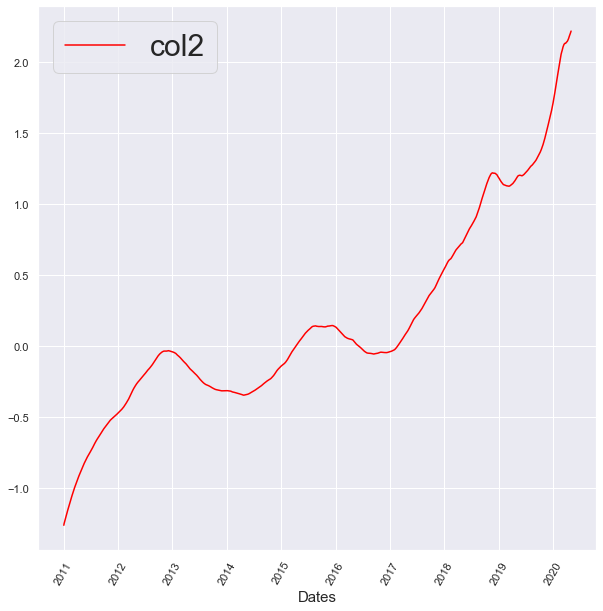

In [328]:
plt.figure(figsize=(10,10))
plt.plot('test', 'col2', data=df, color='red')



plt.xticks(rotation=60)
plt.xlabel('Dates',fontsize=15)
plt.legend(fontsize=30)
plt.show()

In [411]:
# Final 
def double_exponential_smoothing_df(series, alpha, beta):

    result = [series[0]]
    for n in range(1, len(series)+1):
        if n == 1:
            level, trend = series[0], series[1] - series[0]
        if n >= len(series): # forecasting
            value = result[-1]
        else:
            value = series[n]
        last_level, level = level, alpha * value + (1 - alpha) * (level + trend)
        trend = beta * (level - last_level) + (1 - beta) * trend
        result.append(level + trend)
        
    days = pd.date_range(pd.datetime(2011,1,4), pd.datetime(2020,4,30), freq='D')
    df = pd.DataFrame({'date': days, 'result': result})
    return df
    


In [412]:
double_exponential_smoothing_df(Apple.Close, 0.03, 0.001)

date    result
0    2011-01-04 -1.259533
1    2011-01-05 -1.246886
2    2011-01-06 -1.240771
3    2011-01-07 -1.234673
4    2011-01-08 -1.228537
...         ...       ...
3400 2020-04-26  2.504637
3401 2020-04-27  2.509211
3402 2020-04-28  2.511400
3403 2020-04-29  2.518011
3404 2020-04-30  2.519951

[3405 rows x 2 columns]

In [344]:
# def plot_double_exponential_smoothing_FIXED(series, alpha, beta):
#     df=double_exponential_smoothing_df(series, alpha, beta)
#     plt.plot(df.date, df.result, label="Alpha {}, beta {}".format(alpha, beta))
# #     plt.plot(series.values, label = "Actual")
#     plt.legend(loc="best")
#     plt.axis('tight')
#     plt.title("Double Exponential Smoothing")
#     plt.grid(True)

In [413]:
# Final 
def plot_double_exponential_smoothing_FIXED(series, alphas, betas):
    
    for alpha in alphas:
        for beta in betas:
            df=double_exponential_smoothing_df(series, alpha, beta)
            plt.plot(df.date, df.result, label="Alpha {}, beta {}".format(alpha, beta))
#     plt.plot(series.values, label = "Actual")
    plt.legend(loc="best")
    plt.axis('tight')
    plt.title("Double Exponential Smoothing")
    plt.grid(True)



In [337]:
alphas=[0.03]
betas=[0.001]
for alpha in alphas:
    print(alpha)


0.03


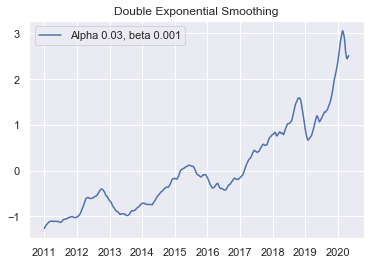

In [350]:
plot_double_exponential_smoothing_FIXED(Apple.Close, alphas=[0.03], betas = [0.001])

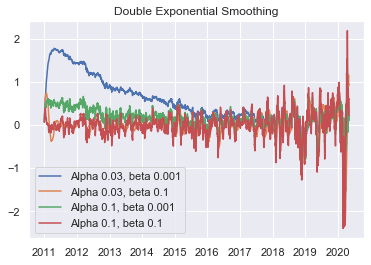

In [415]:
    plot_double_exponential_smoothing_FIXED(Apple.Adj_Close_diff, alphas=[0.03,0.1], betas=[0.001, 0.1])

# Apple


In [27]:
Apple = pd.read_csv("Apple.csv",index_col=0)
Google_trends_df = pd.read_csv("./New Data/Google_trends_data_updated.csv",index_col=0)

In [28]:
# Apple, Apple_with_diff


Apple.date = pd.to_datetime(Apple.date)
# Apple.Date_date = pd.to_datetime(Apple.Date_date)
Apple['Date_date']=Apple['date'].apply(lambda x:x.date())
Apple.Date_date = pd.to_datetime(Apple.Date_date)
Apple = Apple.set_index('date')
Apple = pd.concat([Apple, Google_trends_df['zika']],axis=1)

In [29]:
# Apple = pd.concat([Apple, Google_trends_df['zika']],axis=1)
Apple

Company ticker    Year  Month  Quarter        Open        High  \
2011-01-01            NaN     NaN    NaN      NaN         NaN         NaN   
2011-01-02            NaN     NaN    NaN      NaN         NaN         NaN   
2011-01-03           AAPL  2011.0    1.0      1.0   46.520000   47.180000   
2011-01-04           AAPL  2011.0    1.0      1.0   47.491428   47.500000   
2011-01-05           AAPL  2011.0    1.0      1.0   47.078571   47.762856   
...                   ...     ...    ...      ...         ...         ...   
2020-04-26           AAPL  2020.0    4.0      2.0  277.200012  283.775009   
2020-04-27           AAPL  2020.0    4.0      2.0  281.799988  284.540009   
2020-04-28            NaN     NaN    NaN      NaN         NaN         NaN   
2020-04-29            NaN     NaN    NaN      NaN         NaN         NaN   
2020-04-30            NaN     NaN    NaN      NaN         NaN         NaN   

                   Low       Close   Adj Close       Volume  company_news  \
2011-01-01         NaN         NaN         NaN          NaN           NaN   
2011-01-02         NaN         NaN         NaN          NaN           NaN   
2011-01-03   46.405716   47.081429   40.758278  111284600.0     -0.400141   
2011-01-04   46.878571   47.327145   40.970993   77270200.0     -0.395594   
2011-01-05   47.071430   47.714287   41.306126   63879900.0     -0.377406   
...                ...         ...         ...          ...           ...   
2020-04-26  278.475006  283.070007  282.305817   30449550.0     -0.007800   
2020-04-27  279.950012  283.170013  282.405548   29271900.0      0.563700   
2020-04-28         NaN         NaN         NaN          NaN           NaN   
2020-04-29         NaN         NaN         NaN          NaN           NaN   
2020-04-30         NaN         NaN         NaN          NaN           NaN   

            world_news  company_trends  Coronavirus  presidential election  \
2011-01-01         NaN             NaN          NaN                    NaN   
2011-01-02         NaN             NaN          NaN                    NaN   
2011-01-03      0.7987           29.04         0.00                   0.47   
2011-01-04     -0.8556           28.71         0.00                   0.58   
2011-01-05     -0.9796           27.39         0.00                   0.60   
...                ...             ...          ...                    ...   
2020-04-26      0.9310           41.80        21.45                   0.64   
2020-04-27      0.9882           37.84        22.10                   0.88   
2020-04-28         NaN             NaN          NaN                    NaN   
2020-04-29         NaN             NaN          NaN                    NaN   
2020-04-30         NaN             NaN          NaN                    NaN   

            Lockdown  Pandemic  Quarantine  Date_date  zika  
2011-01-01       NaN       NaN         NaN        NaT  0.00  
2011-01-02       NaN       NaN         NaN        NaT  0.00  
2011-01-03      0.70      1.04        0.31 2011-01-03  0.00  
2011-01-04      0.62      1.08        0.80 2011-01-04  0.00  
2011-01-05      0.88      1.54        0.78 2011-01-05  0.00  
...              ...       ...         ...        ...   ...  
2020-04-26     13.65     37.52       68.04 2020-04-26  1.12  
2020-04-27     16.77     39.53       65.52 2020-04-27  1.20  
2020-04-28       NaN       NaN         NaN        NaT  1.30  
2020-04-29       NaN       NaN         NaN        NaT  1.22  
2020-04-30       NaN       NaN         NaN        NaT  0.86  

[3408 rows x 20 columns]

In [30]:
Apple.columns

Index(['Company ticker', 'Year', 'Month', 'Quarter', 'Open', 'High', 'Low',
       'Close', 'Adj Close', 'Volume', 'company_news', 'world_news',
       'company_trends', 'Coronavirus', 'presidential election', 'Lockdown',
       'Pandemic', 'Quarantine', 'Date_date', 'zika'],
      dtype='object')

In [32]:
Apple.columns = ['Company_ticker', 'Year', 'Month', 'Quarter', 'Open', 'High', 'Low',
       'Close', 'Adj_Close', 'Volume', 'company_news', 'world_news',
       'company_trends', 'Coronavirus', 'presidential_election', 'Lockdown',
       'Pandemic', 'Quarantine', 'Date_date', 'zika']
Apple.columns

Index(['Company_ticker', 'Year', 'Month', 'Quarter', 'Open', 'High', 'Low',
       'Close', 'Adj_Close', 'Volume', 'company_news', 'world_news',
       'company_trends', 'Coronavirus', 'presidential_election', 'Lockdown',
       'Pandemic', 'Quarantine', 'Date_date', 'zika'],
      dtype='object')

Apple
4 time windows
correlation
plot correlation



In [761]:
# # 이게 좋다!!!
# All_by_com =All.groupby(['company_name'])

# All_Year=All.groupby(['company_name']).resample(rule='A').mean()
# All_Quater=All.groupby(['company_name']).resample(rule='Q').mean()
# All_Month=All.groupby(['company_name']).resample(rule='M').mean()

# All_Year_Apple = All_Year.xs('Apple', level='company_name')
# All_Quater_Apple = All_Quater.xs('Apple', level='company_name')
# All_Month_Apple = All_Month.xs('Apple', level='company_name')


In [33]:
Apple_diff = All[(All['company_name'] == 'Apple')]
Apple_diff.columns
Apple_diff.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3404 entries, 2011-01-04 to 2020-04-29
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   company_name           3404 non-null   object 
 1   Open                   3404 non-null   float64
 2   Open_diff              3404 non-null   float64
 3   High                   3404 non-null   float64
 4   Low                    3404 non-null   float64
 5   Close                  3404 non-null   float64
 6   Close_diff             3404 non-null   float64
 7   Adj_Close              3404 non-null   float64
 8   Adj_Close_diff         3404 non-null   float64
 9   Volume                 3404 non-null   float64
 10  Volume_diff            3404 non-null   float64
 11  day_of_week            3404 non-null   object 
 12  company_Google_trends  3404 non-null   float64
 13  Covid_19               3404 non-null   float64
 14  Pandemic               3404 non-null  

In [39]:
Apple_with_diff = pd.concat([Apple,Google_trends_df['zika'],
                  Apple_diff['Close_diff'],
                  Apple_diff['Open_diff'],
                  Apple_diff['Adj_Close_diff'],
                  Apple_diff['Volume_diff']],axis=1)

In [40]:
Apple_with_diff


Company_ticker    Year  Month  Quarter        Open        High  \
2011-01-01            NaN     NaN    NaN      NaN         NaN         NaN   
2011-01-02            NaN     NaN    NaN      NaN         NaN         NaN   
2011-01-03           AAPL  2011.0    1.0      1.0   46.520000   47.180000   
2011-01-04           AAPL  2011.0    1.0      1.0   47.491428   47.500000   
2011-01-05           AAPL  2011.0    1.0      1.0   47.078571   47.762856   
...                   ...     ...    ...      ...         ...         ...   
2020-04-26           AAPL  2020.0    4.0      2.0  277.200012  283.775009   
2020-04-27           AAPL  2020.0    4.0      2.0  281.799988  284.540009   
2020-04-28            NaN     NaN    NaN      NaN         NaN         NaN   
2020-04-29            NaN     NaN    NaN      NaN         NaN         NaN   
2020-04-30            NaN     NaN    NaN      NaN         NaN         NaN   

                   Low       Close   Adj_Close       Volume  company_news  \
2011-01-01         NaN         NaN         NaN          NaN           NaN   
2011-01-02         NaN         NaN         NaN          NaN           NaN   
2011-01-03   46.405716   47.081429   40.758278  111284600.0     -0.400141   
2011-01-04   46.878571   47.327145   40.970993   77270200.0     -0.395594   
2011-01-05   47.071430   47.714287   41.306126   63879900.0     -0.377406   
...                ...         ...         ...          ...           ...   
2020-04-26  278.475006  283.070007  282.305817   30449550.0     -0.007800   
2020-04-27  279.950012  283.170013  282.405548   29271900.0      0.563700   
2020-04-28         NaN         NaN         NaN          NaN           NaN   
2020-04-29         NaN         NaN         NaN          NaN           NaN   
2020-04-30         NaN         NaN         NaN          NaN           NaN   

            world_news  company_trends  Coronavirus  presidential_election  \
2011-01-01         NaN             NaN          NaN                    NaN   
2011-01-02         NaN             NaN          NaN                    NaN   
2011-01-03      0.7987           29.04         0.00                   0.47   
2011-01-04     -0.8556           28.71         0.00                   0.58   
2011-01-05     -0.9796           27.39         0.00                   0.60   
...                ...             ...          ...                    ...   
2020-04-26      0.9310           41.80        21.45                   0.64   
2020-04-27      0.9882           37.84        22.10                   0.88   
2020-04-28         NaN             NaN          NaN                    NaN   
2020-04-29         NaN             NaN          NaN                    NaN   
2020-04-30         NaN             NaN          NaN                    NaN   

            Lockdown  Pandemic  Quarantine  Date_date  zika  zika  Close_diff  \
2011-01-01       NaN       NaN         NaN        NaT  0.00  0.00         NaN   
2011-01-02       NaN       NaN         NaN        NaT  0.00  0.00         NaN   
2011-01-03      0.70      1.04        0.31 2011-01-03  0.00  0.00         NaN   
2011-01-04      0.62      1.08        0.80 2011-01-04  0.00  0.00    0.081828   
2011-01-05      0.88      1.54        0.78 2011-01-05  0.00  0.00    0.147949   
...              ...       ...         ...        ...   ...   ...         ...   
2020-04-26     13.65     37.52       68.04 2020-04-26  1.12  1.12   -0.033053   
2020-04-27     16.77     39.53       65.52 2020-04-27  1.20  1.20    0.013704   
2020-04-28       NaN       NaN         NaN        NaT  1.30  1.30   -2.179046   
2020-04-29       NaN       NaN         NaN        NaT  1.22  1.22    4.244895   
2020-04-30       NaN       NaN         NaN        NaT  0.86  0.86         NaN   

            Open_diff  Adj_Close_diff  Volume_diff  
2011-01-01        NaN             NaN          NaN  
2011-01-02        NaN             NaN          NaN  
2011-01-03        NaN             NaN          NaN  
2011-01-04   0.439924        0.067358  

In [41]:
Apple_with_diff.columns

Index(['Company_ticker', 'Year', 'Month', 'Quarter', 'Open', 'High', 'Low',
       'Close', 'Adj_Close', 'Volume', 'company_news', 'world_news',
       'company_trends', 'Coronavirus', 'presidential_election', 'Lockdown',
       'Pandemic', 'Quarantine', 'Date_date', 'zika', 'zika', 'Close_diff',
       'Open_diff', 'Adj_Close_diff', 'Volume_diff'],
      dtype='object')

In [42]:
# Apple_with_diff.columns = ['Company_ticker', 'date', 'Year', 'Month', 'Quarter', 'Open', 'High',
#        'Low', 'Close', 'Adj_Close', 'Volume', 'company_news', 'world_news',
#        'company_trends', 'Coronavirus', 'presidential_election', 'Lockdown',
#        'Pandemic', 'Quarantine', 'zika', 'Open_diff', 'Close_diff',
#        'Adj_Close_diff', 'Volume_diff']



In [44]:

Apple_with_diff.Date_date = pd.to_datetime(Apple_with_diff.Date_date)
# Apple_with_diff = Apple_with_diff.set_index('date')

In [48]:


Apple_with_diff = Apple_with_diff['2011-01-03':'2020-04-27']
Apple_with_diff.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3403 entries, 2011-01-03 to 2020-04-27
Freq: D
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Company_ticker         3403 non-null   object        
 1   Year                   3403 non-null   float64       
 2   Month                  3403 non-null   float64       
 3   Quarter                3403 non-null   float64       
 4   Open                   3403 non-null   float64       
 5   High                   3403 non-null   float64       
 6   Low                    3403 non-null   float64       
 7   Close                  3403 non-null   float64       
 8   Adj_Close              3403 non-null   float64       
 9   Volume                 3403 non-null   float64       
 10  company_news           3403 non-null   float64       
 11  world_news             3403 non-null   float64       
 12  company_trends         3403 non-null

In [25]:
# # Apple, Apple_with_diff


# Apple.date = pd.to_datetime(Apple.date)
# # Apple.Date_date = pd.to_datetime(Apple.Date_date)
# Apple['Date_date']=Apple['date'].apply(lambda x:x.date())
# Apple.Date_date = pd.to_datetime(Apple.Date_date)
# Apple = Apple.set_index('date')
# Apple = pd.concat([Apple, Google_trends_df['zika']],axis=1)

In [46]:
Apple = Apple[['Company_ticker', 'Year', 'Month', 'Quarter', 'Open', 'High', 'Low',
       'Close', 'Adj_Close', 'Volume', 'company_news', 'world_news',
       'company_trends', 'Coronavirus', 'presidential_election', 'Lockdown',
       'Pandemic', 'Quarantine', 'zika', 'Date_date']]

In [49]:
Apple = Apple['2011-01-03':'2020-04-27']
Apple.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3403 entries, 2011-01-03 to 2020-04-27
Freq: D
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Company_ticker         3403 non-null   object        
 1   Year                   3403 non-null   float64       
 2   Month                  3403 non-null   float64       
 3   Quarter                3403 non-null   float64       
 4   Open                   3403 non-null   float64       
 5   High                   3403 non-null   float64       
 6   Low                    3403 non-null   float64       
 7   Close                  3403 non-null   float64       
 8   Adj_Close              3403 non-null   float64       
 9   Volume                 3403 non-null   float64       
 10  company_news           3403 non-null   float64       
 11  world_news             3403 non-null   float64       
 12  company_trends         3403 non-null

### Data Quality



In [50]:
Apple.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3403 entries, 2011-01-03 to 2020-04-27
Freq: D
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Company_ticker         3403 non-null   object        
 1   Year                   3403 non-null   float64       
 2   Month                  3403 non-null   float64       
 3   Quarter                3403 non-null   float64       
 4   Open                   3403 non-null   float64       
 5   High                   3403 non-null   float64       
 6   Low                    3403 non-null   float64       
 7   Close                  3403 non-null   float64       
 8   Adj_Close              3403 non-null   float64       
 9   Volume                 3403 non-null   float64       
 10  company_news           3403 non-null   float64       
 11  world_news             3403 non-null   float64       
 12  company_trends         3403 non-null

In [51]:
pd.set_option('display.max_columns', None)
print(Apple.describe())

              Year        Month      Quarter         Open         High  \
count  3403.000000  3403.000000  3403.000000  3403.000000  3403.000000   
mean   2015.175140     6.385542     2.465178   124.302751   125.470905   
std       2.695807     3.474192     1.124865    61.024617    61.709191   
min    2011.000000     1.000000     1.000000    45.240002    45.385715   
25%    2013.000000     3.000000     1.000000    76.784286    77.455002   
50%    2015.000000     6.000000     2.000000   109.230003   110.419998   
75%    2017.000000     9.000000     3.000000   164.940002   166.860001   
max    2020.000000    12.000000     4.000000   324.739990   327.850006   

               Low        Close    Adj_Close        Volume  company_news  \
count  3403.000000  3403.000000  3403.000000  3.403000e+03   3403.000000   
mean    123.112973   124.347577   117.544110  6.570850e+07      0.523105   
std      60.368107    61.120861    63.069598  5.015772e+07      0.439636   
min      44.357143    45.0457

In [52]:
print(Apple[["Company_ticker", "Date_date"]].describe())

       Company_ticker            Date_date
count            3403                 3403
unique              1                 3403
top              AAPL  2018-08-08 00:00:00
freq             3403                    1
first             NaN  2011-01-03 00:00:00
last              NaN  2020-04-27 00:00:00


In [53]:
## Show the number of data per attributes that has missing values
print(Apple.isna().sum())

Company_ticker           0
Year                     0
Month                    0
Quarter                  0
Open                     0
High                     0
Low                      0
Close                    0
Adj_Close                0
Volume                   0
company_news             0
world_news               0
company_trends           0
Coronavirus              0
presidential_election    0
Lockdown                 0
Pandemic                 0
Quarantine               0
zika                     0
Date_date                0
dtype: int64


In [54]:
# ## Initialize a 6 x 6in figure
# fig = plt.figure(figsize = (6, 6))

# ## Make the box plot
# plt.boxplot(Apple["Open"] , labels = ["Open"])
# plt.boxplot(Apple["Open_diff"] , labels = ["Open_diff"])

# # ## Adjust the tick and label font size
# # plt.tick_params(labelsize = 15)

# # ## Set the title
# # plt.title("The normalized number of words related to 'liking' sentiment", fontsize = 15)

In [55]:
Apple.columns


Index(['Company_ticker', 'Year', 'Month', 'Quarter', 'Open', 'High', 'Low',
       'Close', 'Adj_Close', 'Volume', 'company_news', 'world_news',
       'company_trends', 'Coronavirus', 'presidential_election', 'Lockdown',
       'Pandemic', 'Quarantine', 'zika', 'Date_date'],
      dtype='object')

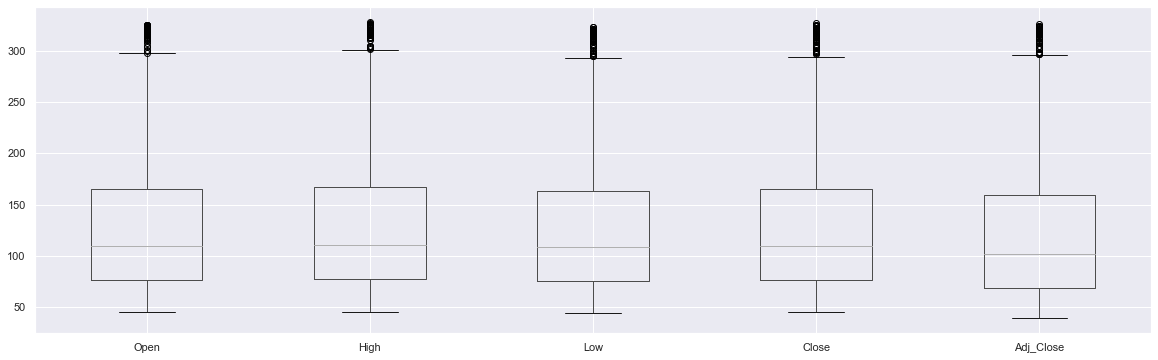

In [56]:
fig = plt.figure(figsize = (20, 6))
boxplot = Apple.boxplot(column=['Open', 'High', 'Low',
       'Close', 'Adj_Close'])

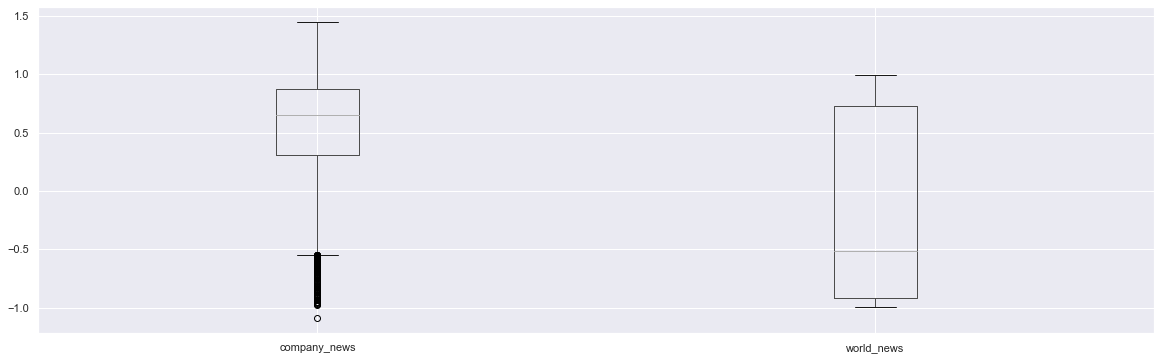

In [57]:
fig = plt.figure(figsize = (20, 6))
boxplot = Apple.boxplot(column=['company_news', 'world_news'])

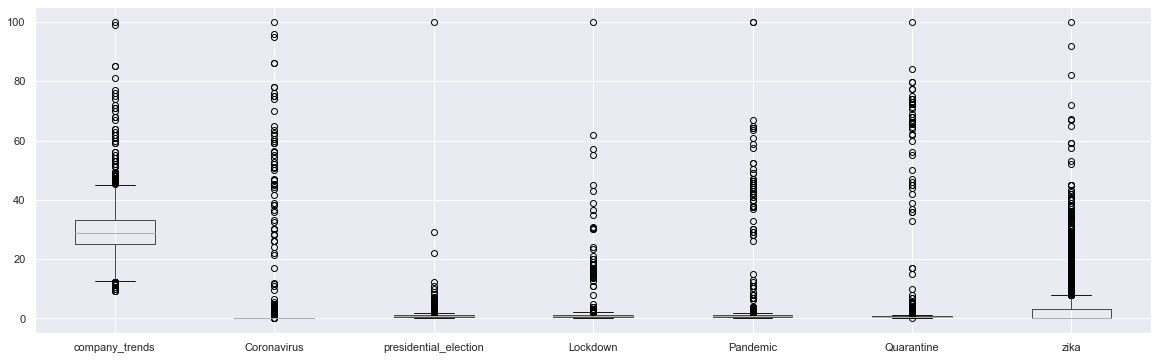

In [58]:
fig = plt.figure(figsize = (20, 6))
boxplot = Apple.boxplot(column=['company_trends', 'Coronavirus', 'presidential_election', 'Lockdown',
       'Pandemic', 'Quarantine', 'zika'])



### Outlier Detection



In [59]:
## The first attribute ('Company_ticker'), and the last attribute (Date_date) are categorical
## Therefore, we cannot calculate z-score.
## Excluding Company_ticker, day_of_week,'Year', 'Month', 'Quarter', and Date_date

Apple_excluded_object = Apple[[ 'Open', 'High', 'Low',
       'Close', 'Adj_Close', 'Volume', 'company_news', 'world_news',
       'company_trends', 'Coronavirus', 'presidential_election', 'Lockdown',
       'Pandemic', 'Quarantine', 'zika']]



In [60]:
z = np.abs(stats.zscore(Apple_excluded_object))
print(z)

[[1.27479999e+00 1.26889381e+00 1.27084539e+00 ... 8.95374478e-02
  1.61752764e-01 4.34163464e-01]
 [1.25887903e+00 1.26370744e+00 1.26301139e+00 ... 8.25503310e-02
  9.67138010e-02 4.34163464e-01]
 [1.26564544e+00 1.25944723e+00 1.25981619e+00 ... 2.19848818e-03
  9.93684525e-02 4.34163464e-01]
 ...
 [2.50586960e+00 2.56570157e+00 2.57395624e+00 ... 6.28271305e+00
  8.38224331e+00 2.92718458e-01]
 [2.50586960e+00 2.56570157e+00 2.57395624e+00 ... 6.28271305e+00
  8.82822477e+00 2.78851300e-01]
 [2.58125969e+00 2.57810024e+00 2.59839336e+00 ... 6.63381566e+00
  8.49373867e+00 2.67757574e-01]]


# The above numbers represent z scores of our data. It is difficult to say which data point is an outlier. Let’s try and define a threshold to identify an outlier. To be conservative, we will use 3 as a threshold. We can exclude 0.3% of data.

In [61]:
threshold = 3
print(np.where(z > 3))

(array([  14,   15,   16,   38,   50,   72,  116,  156,  198,  213,  214,
        215,  216,  217,  218,  219,  234,  262,  274,  274,  276,  281,
        288,  289,  387,  402,  408,  409,  422,  429,  436,  437,  441,
        463,  467,  468,  469,  470,  471,  473,  474,  475,  476,  477,
        478,  535,  569,  618,  640,  653,  659,  662,  663,  664,  665,
        666,  673,  674,  675,  676,  683,  684,  685,  702,  703,  711,
        712,  713,  743,  752,  753,  754,  755,  758,  835,  842,  868,
        924,  953,  981,  982, 1082, 1089, 1121, 1248, 1345, 1446, 1468,
       1634, 1661, 1710, 1774, 1811, 1851, 1852, 1853, 1855, 1856, 1857,
       1858, 1859, 1860, 1861, 1862, 1863, 1864, 1865, 1866, 1867, 1884,
       1885, 1885, 1886, 1892, 1899, 1912, 1926, 1941, 1942, 1951, 1956,
       1961, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973,
       1974, 1975, 1976, 1977, 1978, 2034, 2035, 2036, 2037, 2038, 2038,
       2039, 2040, 2041, 2042, 2043, 2044, 2045, 2

The first array contains the list of row numbers, and the second array corresponding column numbers that have a Z-score higher than 3, which mean they are: z[15][5], z[3404][16], and so on.

In [62]:
unique_elements, counts_elements = np.unique(np.where(z > 3)[0], return_counts=True)
print(np.asarray((unique_elements, counts_elements)))

[[  14   15   16   38   50   72  116  156  198  213  214  215  216  217
   218  219  234  262  274  276  281  288  289  387  402  408  409  422
   429  436  437  441  463  467  468  469  470  471  473  474  475  476
   477  478  535  569  618  640  653  659  662  663  664  665  666  673
   674  675  676  683  684  685  702  703  711  712  713  743  752  753
   754  755  758  835  842  868  924  953  981  982 1082 1089 1121 1248
  1345 1446 1468 1634 1661 1710 1774 1811 1851 1852 1853 1855 1856 1857
  1858 1859 1860 1861 1862 1863 1864 1865 1866 1867 1884 1885 1886 1892
  1899 1912 1926 1941 1942 1951 1956 1961 1964 1965 1966 1967 1968 1969
  1970 1971 1972 1973 1974 1975 1976 1977 1978 2034 2035 2036 2037 2038
  2039 2040 2041 2042 2043 2044 2045 2046 2047 2048 2049 2050 2051 2052
  2053 2054 2055 2056 2057 2058 2059 2060 2061 2062 2063 2064 2065 2066
  2068 2069 2070 2071 2072 2073 2074 2075 2076 2077 2078 2079 2080 2107
  2117 2136 2137 2138 2188 2191 2192 2256 2444 2515 2516 2657 27

The first list represents the row number when the z score is larger than 3. The second list represents the frequency of the corresponding row. The row 3374, 3376, 3377 and 3379 have the largest number of outliers.

Need to remove these tuples from the dataset?

In [63]:
days = Apple.Date_date
days

2011-01-03   2011-01-03
2011-01-04   2011-01-04
2011-01-05   2011-01-05
2011-01-06   2011-01-06
2011-01-07   2011-01-07
                ...    
2020-04-23   2020-04-23
2020-04-24   2020-04-24
2020-04-25   2020-04-25
2020-04-26   2020-04-26
2020-04-27   2020-04-27
Freq: D, Name: Date_date, Length: 3403, dtype: datetime64[ns]

In [64]:
def top_correlation (df):
    corr_matrix = df.corr()
    correlation = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=False))
    correlation = pd.DataFrame(correlation).reset_index()
    correlation.columns=["Variable_1","Variable_2","Correlacion"]
    correlation = correlation.reindex(correlation.Correlacion.abs().sort_values(ascending=False).index).reset_index().drop(["index"],axis=1)
    return correlation

In [65]:
# Final 
def double_exponential_smoothing_df(company, series, alpha, beta):
    result = [series[0]]
    for n in range(1, len(series)+1):
        if n == 1:
            level, trend = series[0], series[1] - series[0]
        if n >= len(series): # forecasting
            value = result[-1]
        else:
            value = series[n]
        last_level, level = level, alpha * value + (1 - alpha) * (level + trend)
        trend = beta * (level - last_level) + (1 - beta) * trend
        result.append(level + trend)
        
    result = result[:-1]
    days = company.Date_date
    df = pd.DataFrame({'date': days, 'result': result})
    return df

In [66]:
# Final 
def plot_double_exponential_smoothing_FIXED(company, series, alphas, betas):
    for alpha in alphas:
        for beta in betas:
            df=double_exponential_smoothing_df(company, series, alpha, beta)
            plt.plot(df.date, df.result, label="Alpha {}, beta {}".format(alpha, beta))
    
    plt.xticks(rotation=60)
    plt.xlabel('Dates',fontsize=15)
    plt.legend(loc="best")
    plt.axis('tight')
    plt.title("Double Exponential Smoothing")
    plt.grid(True)

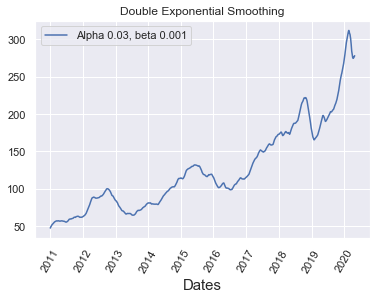

In [67]:
plot_double_exponential_smoothing_FIXED(Apple, Apple.Close, alphas=[0.03], betas=[0.001])

In [68]:
# # 이게 좋다!!!
# All_by_com =All.groupby(['company_name'])

# All_Year=All.groupby(['company_name']).resample(rule='A').mean()
# All_Quater=All.groupby(['company_name']).resample(rule='Q').mean()
# All_Month=All.groupby(['company_name']).resample(rule='M').mean()

# All_Year_Apple = All_Year.xs('Apple', level='company_name')
# All_Quater_Apple = All_Quater.xs('Apple', level='company_name')
# All_Month_Apple = All_Month.xs('Apple', level='company_name')

In [69]:
Apple.info()

Apple.columns

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3403 entries, 2011-01-03 to 2020-04-27
Freq: D
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Company_ticker         3403 non-null   object        
 1   Year                   3403 non-null   float64       
 2   Month                  3403 non-null   float64       
 3   Quarter                3403 non-null   float64       
 4   Open                   3403 non-null   float64       
 5   High                   3403 non-null   float64       
 6   Low                    3403 non-null   float64       
 7   Close                  3403 non-null   float64       
 8   Adj_Close              3403 non-null   float64       
 9   Volume                 3403 non-null   float64       
 10  company_news           3403 non-null   float64       
 11  world_news             3403 non-null   float64       
 12  company_trends         3403 non-null

Index(['Company_ticker', 'Year', 'Month', 'Quarter', 'Open', 'High', 'Low',
       'Close', 'Adj_Close', 'Volume', 'company_news', 'world_news',
       'company_trends', 'Coronavirus', 'presidential_election', 'Lockdown',
       'Pandemic', 'Quarantine', 'zika', 'Date_date'],
      dtype='object')

In [70]:
## Excluding Company_ticker, day_of_week,'Year', 'Month', 'Quarter', and Date_date
# standardizing
mean = np.mean(Apple_excluded_object, axis=0)
std = np.std(Apple_excluded_object, axis=0, ddof=1)
Apple_std = (Apple_excluded_object-mean)/std

# Apple = pd.concat([Apple, Google_trends_df['zika']],axis=1)

Apple_std = pd.concat([Apple_std, Apple['Date_date']],axis=1)
Apple = Apple_std

Apple_with_diff

Apple_corr = Apple[['Close', 'Volume', 'company_news',
       'world_news', 'company_trends', 'Coronavirus', 'presidential_election',
       'Lockdown', 'Pandemic', 'Quarantine', 'zika']]

In [71]:
Apple_corr = pd.concat([Apple_corr, Apple_with_diff['Close_diff']],axis=1)

Apple_corr

Close    Volume  company_news  world_news  company_trends  \
2011-01-03 -1.264153  0.908656     -2.100022    1.249718       -0.001671   
2011-01-04 -1.260133  0.230507     -2.089679   -0.872478       -0.044548   
2011-01-05 -1.253799 -0.036457     -2.048308   -1.031549       -0.216054   
2011-01-06 -1.254430  0.187383     -2.068994    0.352117       -0.130301   
2011-01-07 -1.248844  0.244714     -2.100022   -0.513027       -0.001671   
...              ...       ...           ...         ...             ...   
2020-04-23  2.465319 -0.687928     -0.412852    1.456254        1.141708   
2020-04-24  2.595226 -0.679483      0.911424    1.485631        1.313215   
2020-04-25  2.596862 -0.702962      0.976250   -0.964329        1.599060   
2020-04-26  2.596862 -0.702962     -1.207600    1.419437        1.656229   
2020-04-27  2.598498 -0.726441      0.092338    1.492815        1.141708   

            Coronavirus  presidential_election  Lockdown  Pandemic  \
2011-01-03    -0.128978              -0.229572 -0.140407 -0.089524   
2011-01-04    -0.128978              -0.174230 -0.163843 -0.082538   
2011-01-05    -0.128978              -0.164167 -0.087676 -0.002198   
2011-01-06    -0.128978              -0.098762 -0.169702 -0.044115   
2011-01-07    -0.128978              -0.128949 -0.204856 -0.096510   
...                 ...                    ...       ...       ...   
2020-04-23     4.939192              -0.093731  4.338778  7.685994   
2020-04-24     5.210701              -0.013232  3.767528  6.866875   
2020-04-25     3.491144              -0.113856  3.310528  6.281790   
2020-04-26     2.857622              -0.144043  3.653278  6.281790   
2020-04-27     2.948125              -0.023294  4.567278  6.632841   

            Quarantine      zika  Close_diff  
2011-01-03   -0.161729 -0.434100         NaN  
2011-01-04   -0.096700 -0.434100    0.081828  
2011-01-05   -0.099354 -0.434100    0.147949  
2011-01-06   -0.070157 -0.434100   -0.051087  
2011-01-07   -0.121915 -0.434100    0.126578  
...                ...       ...         ...  
2020-04-23    8.269533 -0.242761   -0.533317  
2020-04-24    8.046575 -0.262172    3.679168  
2020-04-25    8.381012 -0.292675    0.013704  
2020-04-26    8.826928 -0.278810   -0.033053  
2020-04-27    8.492491 -0.267718    0.013704  

[3403 rows x 12 columns]

In [72]:
# slicing for time windows and resampling


Apple_Year=Apple.resample(rule='A').mean()
Apple_Quater=Apple.resample(rule='Q').mean()
Apple_Month=Apple.resample(rule='M').mean()

# slicing for time windows
Apple_Covid19 = Apple['2020-01-01':'2020-04-30']
Apple_corr_Covid19 = Apple_corr['2020-01-01':'2020-04-30']

# Apple_Flu = Apple_std['2009-01-01':'2010-08-30']

Apple_Zika = Apple['2015-01-01':'2016-01-01']
Apple_corr_Zika = Apple_corr['2015-01-01':'2016-01-01']

Apple_election_2016 = Apple['2016-06-01':'2017-05-30']
Apple_corr_election_2016 = Apple_corr['2016-06-01':'2017-05-30']

Apple_election_2012 = Apple['2012-06-01':'2013-05-30']
Apple_corr_election_2012 = Apple_corr['2012-06-01':'2013-05-30']



# Presidential Election 2012

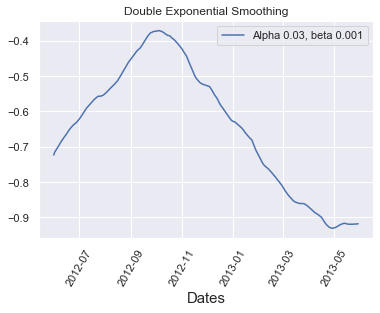

In [73]:
# Apple_election_2012
plot_double_exponential_smoothing_FIXED(Apple_election_2012, Apple_election_2012.Close, alphas=[0.03], betas=[0.001])


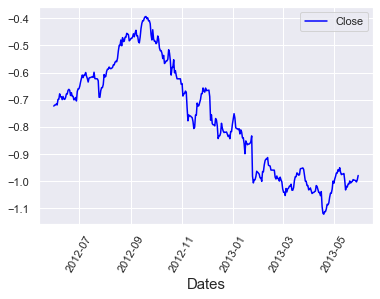

In [74]:
plt.plot('Date_date', 'Close', data=Apple_election_2012, color='Blue')



plt.xticks(rotation=60)
plt.xlabel('Dates',fontsize=15)
plt.legend()
plt.show()

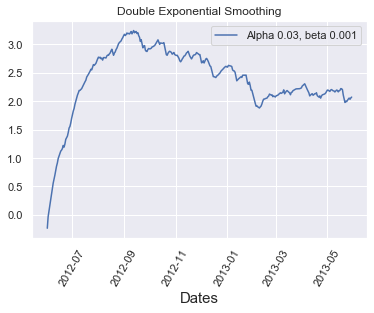

In [75]:
plot_double_exponential_smoothing_FIXED(Apple_election_2012, Apple_election_2012.company_news, alphas=[0.03], betas=[0.001])




## Correlation

In [82]:
top_correlation (Apple_corr_election_2012)

Variable_1             Variable_2   Correlacion
0    Coronavirus                   zika -1.000000e+00
1          Close               Pandemic -3.605529e-01
2          Close  presidential_election  2.949540e-01
3         Volume               Pandemic  2.221593e-01
4         Volume             Close_diff -2.206985e-01
..           ...                    ...           ...
61      Pandemic                   zika  1.466355e-16
62  company_news                   zika  1.302007e-16
63   Coronavirus  presidential_election -1.440512e-17
64  company_news            Coronavirus -1.422301e-17
65   Coronavirus               Pandemic -3.780446e-18

[66 rows x 3 columns]

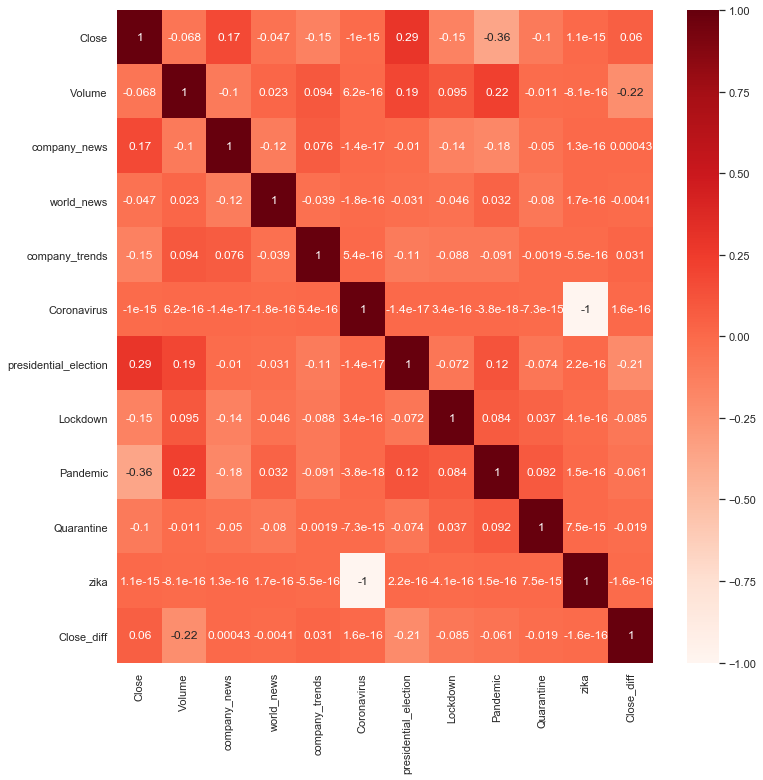

In [83]:
#checking redundancies in attributes and/or tuples.
pcorr = Apple_corr_election_2012.corr(method='pearson')

## Set the maximum number of columns as "None" to display all columns
pd.set_option('display.max_columns', None)
# pcorr
plt.figure(figsize=(12,12))
sns.heatmap(pcorr, annot=True, cmap=plt.cm.Reds)
plt.show()

# Presidential Election 2016

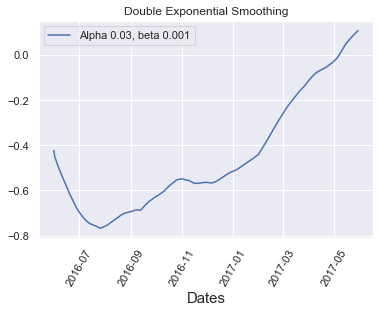

In [78]:
# Apple_election_2016
plot_double_exponential_smoothing_FIXED(Apple_election_2016, Apple_election_2016.Close, alphas=[0.03], betas=[0.001])



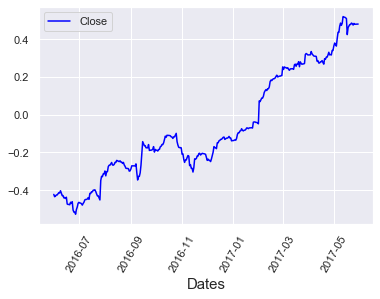

In [79]:
plt.plot('Date_date', 'Close', data=Apple_election_2016, color='Blue')



plt.xticks(rotation=60)
plt.xlabel('Dates',fontsize=15)
plt.legend()
plt.show()

## Correlation

In [84]:
top_correlation (Apple_corr_election_2016)

Variable_1             Variable_2   Correlacion
0            Close                   zika -5.048364e-01
1         Lockdown                   zika -3.680143e-01
2            Close               Lockdown  3.411893e-01
3            Close                 Volume -3.033781e-01
4            Close         company_trends  2.972435e-01
..             ...                    ...           ...
61     Coronavirus  presidential_election -1.691286e-16
62  company_trends            Coronavirus -1.681515e-16
63      world_news            Coronavirus  1.418370e-16
64     Coronavirus               Lockdown  2.310577e-17
65     Coronavirus             Close_diff -1.433661e-17

[66 rows x 3 columns]

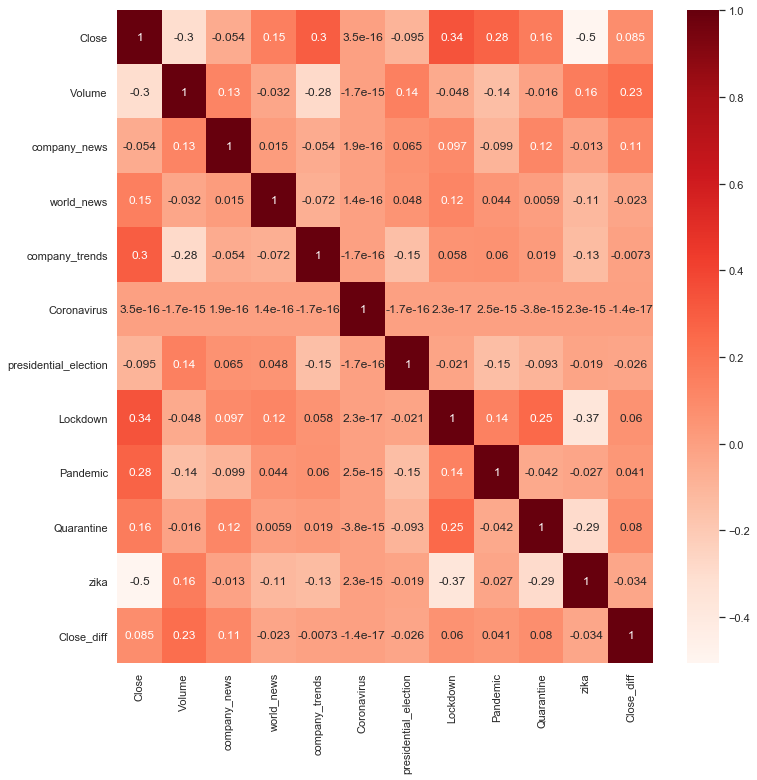

In [85]:
#checking redundancies in attributes and/or tuples.
pcorr = Apple_corr_election_2016.corr(method='pearson')

## Set the maximum number of columns as "None" to display all columns
pd.set_option('display.max_columns', None)
# pcorr
plt.figure(figsize=(12,12))
sns.heatmap(pcorr, annot=True, cmap=plt.cm.Reds)
plt.show()

# Zika Pandemic  '2015-01-01'~'2016-01-01'

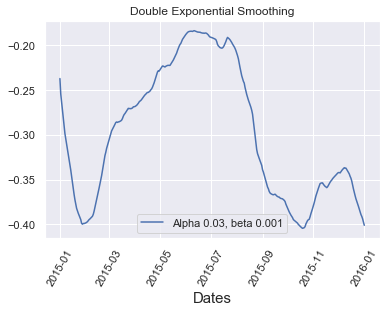

In [113]:
# Apple_Zika
plot_double_exponential_smoothing_FIXED(Apple_Zika, Apple_Zika.Close, alphas=[0.03], betas=[0.001])


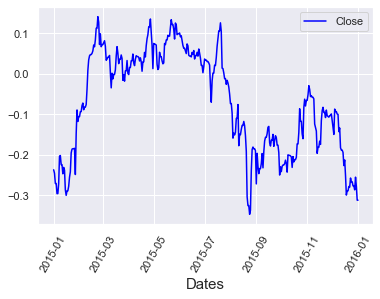

In [734]:
plt.plot('Date_date', 'Close', data=Apple_Zika, color='Blue')



plt.xticks(rotation=60)
plt.xlabel('Dates',fontsize=15)
plt.legend()
plt.show()

## Correlation

In [86]:
top_correlation (Apple_corr_Zika)

Variable_1             Variable_2   Correlacion
0            Close                   zika -2.909803e-01
1            Close               Lockdown -2.307320e-01
2            Close         company_trends -2.074006e-01
3            Close                 Volume -2.022295e-01
4   company_trends               Pandemic -1.838371e-01
..             ...                    ...           ...
61          Volume            Coronavirus -2.817583e-16
62    company_news            Coronavirus  1.057659e-16
63     Coronavirus  presidential_election -7.412200e-17
64      world_news            Coronavirus -4.870121e-17
65     Coronavirus             Close_diff  5.184213e-18

[66 rows x 3 columns]

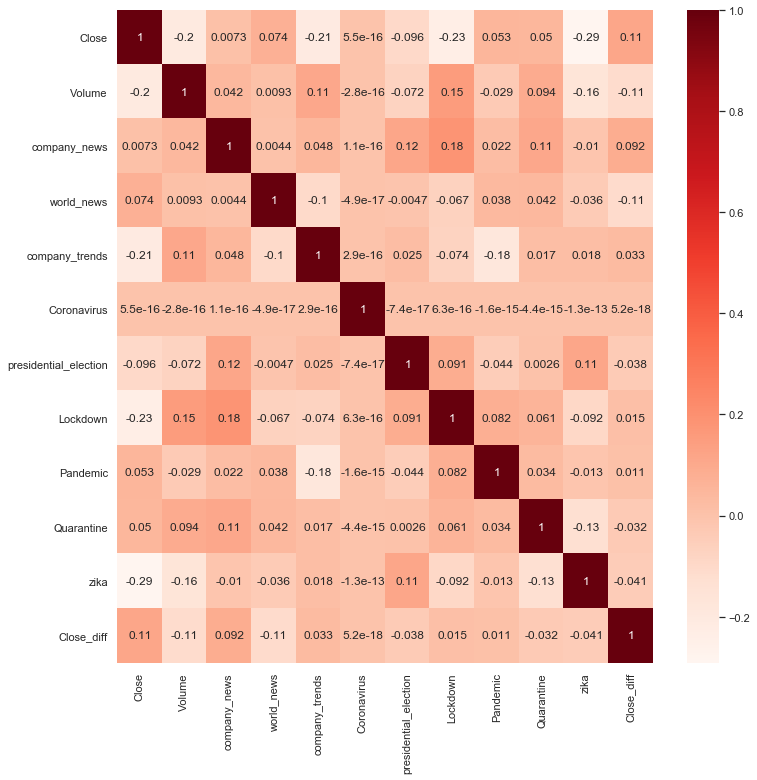

In [87]:
#checking redundancies in attributes and/or tuples.
pcorr = Apple_corr_Zika.corr(method='pearson')

## Set the maximum number of columns as "None" to display all columns
pd.set_option('display.max_columns', None)
# pcorr
plt.figure(figsize=(12,12))
sns.heatmap(pcorr, annot=True, cmap=plt.cm.Reds)
plt.show()

# Covid-19 

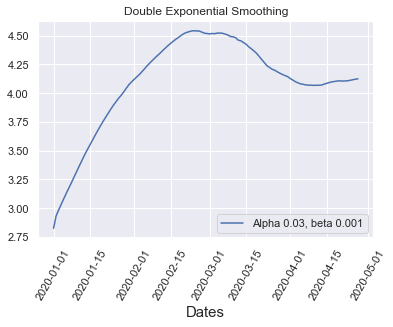

In [735]:
# Apple_Covid19
plot_double_exponential_smoothing_FIXED(Apple_Covid19, Apple_Covid19.Close, alphas=[0.03], betas=[0.001])



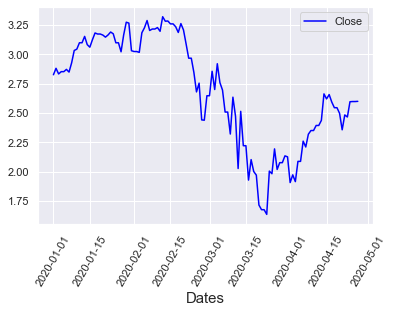

In [736]:
plt.plot('Date_date', 'Close', data=Apple_Covid19, color='Blue')



plt.xticks(rotation=60)
plt.xlabel('Dates',fontsize=15)
plt.legend()
plt.show()

## Correlation

In [88]:
top_correlation (Apple_corr_Covid19)

Variable_1   Variable_2  Correlacion
0            Close  Coronavirus    -0.893059
1         Pandemic   Quarantine     0.854403
2      Coronavirus     Pandemic     0.836038
3      Coronavirus   Quarantine     0.801803
4            Close     Lockdown    -0.800751
..             ...          ...          ...
61      world_news   Close_diff     0.032253
62  company_trends   Quarantine     0.031764
63    company_news   Close_diff     0.022428
64  company_trends   Close_diff     0.009137
65      Quarantine   Close_diff     0.002540

[66 rows x 3 columns]

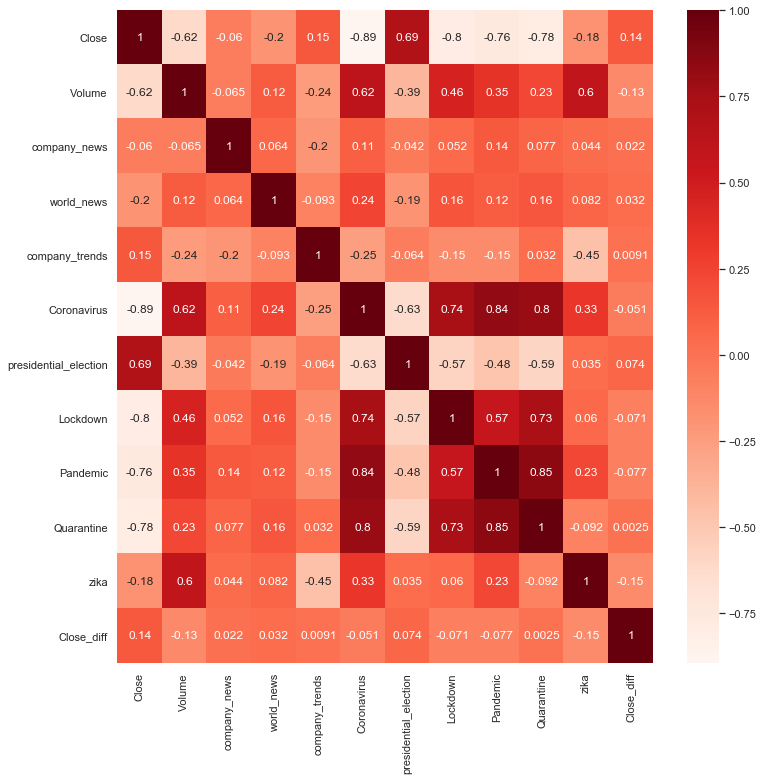

In [89]:
#checking redundancies in attributes and/or tuples.
pcorr = Apple_corr_Covid19.corr(method='pearson')

## Set the maximum number of columns as "None" to display all columns
pd.set_option('display.max_columns', None)
# pcorr
plt.figure(figsize=(12,12))
sns.heatmap(pcorr, annot=True, cmap=plt.cm.Reds)
plt.show()

In [90]:
corr = Apple_corr_Covid19.corr()
corr.style.background_gradient(cmap='Blues')

# All 4 time windows



In [107]:
def All_timewindows(company, series, alphas, betas):
    for alpha in alphas:
        for beta in betas:
            df=double_exponential_smoothing_df(company, series, alpha, beta)
            plt.plot(df.date, df.result, label="Alpha {}, beta {}".format(alpha, beta))
    
    plt.plot('Date_date', 'Close', data=Apple, color='blue', label='Apple Close')
    plt.plot('Date_date', 'Close', data=Apple_Covid19, color='yellow', label='Covid19 Close')
    plt.plot('Date_date', 'Close', data=Apple_Zika, color='red', label='Zika Close')
    plt.plot('Date_date', 'Close', data=Apple_election_2016, color='pink', label='election_2016 Close')
    plt.plot('Date_date', 'Close', data=Apple_election_2012, color='purple', label='election_2012 Close')


    plt.xticks(rotation=60)
    plt.xlabel('Dates',fontsize=15)
    plt.legend(loc="best")
    plt.axis('tight')
    plt.title("Double Exponential Smoothing")
    plt.grid(True)

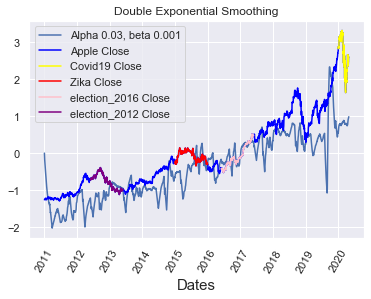

In [108]:
All_timewindows(Apple, Apple.company_trends, alphas=[0.03], betas=[0.001])



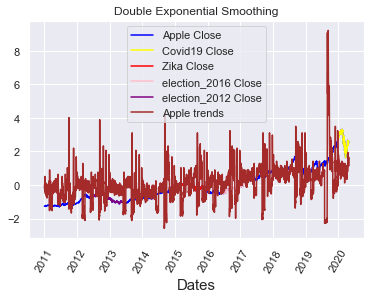

In [106]:
plt.plot('Date_date', 'Close', data=Apple, color='blue', label='Apple Close')
plt.plot('Date_date', 'Close', data=Apple_Covid19, color='yellow', label='Covid19 Close')
plt.plot('Date_date', 'Close', data=Apple_Zika, color='red', label='Zika Close')
plt.plot('Date_date', 'Close', data=Apple_election_2016, color='pink', label='election_2016 Close')
plt.plot('Date_date', 'Close', data=Apple_election_2012, color='purple', label='election_2012 Close')
plt.plot('Date_date', 'company_trends', data=Apple, color='brown', label='Apple trends')



plt.xticks(rotation=60)
plt.xlabel('Dates',fontsize=15)
plt.legend(loc="best")
plt.axis('tight')
plt.title("Double Exponential Smoothing")
plt.grid(True)

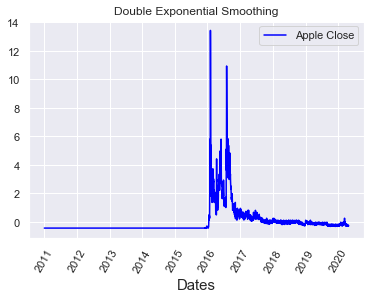

In [133]:
plt.plot('Date_date', 'zika', data=Apple, color='blue', label='Apple Close')




plt.xticks(rotation=60)
plt.xlabel('Dates',fontsize=15)
plt.legend(loc="best")
plt.axis('tight')
plt.title("Double Exponential Smoothing")
plt.grid(True)

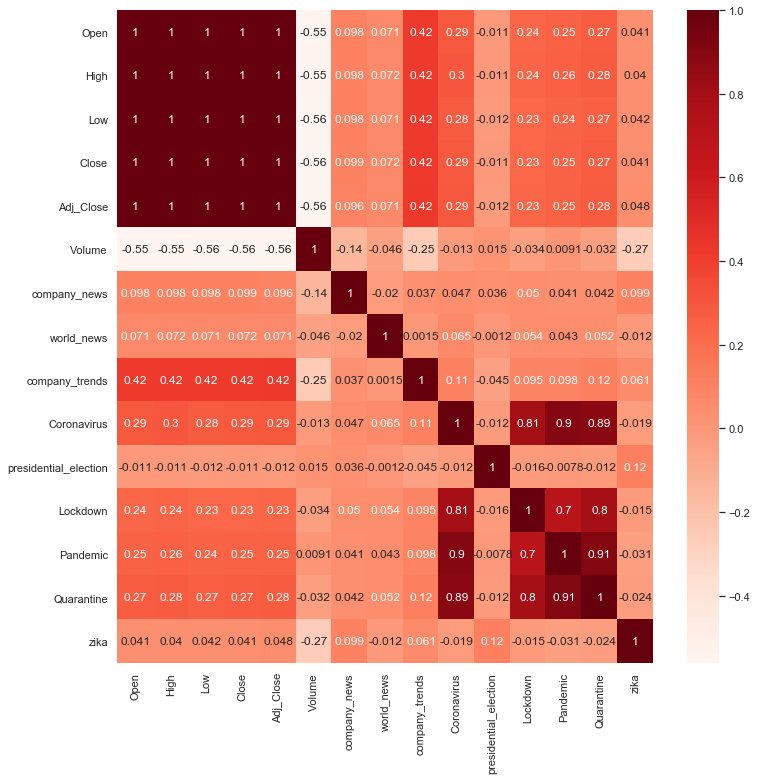

In [102]:
#checking redundancies in attributes and/or tuples.
pcorr = Apple.corr(method='pearson')

## Set the maximum number of columns as "None" to display all columns
pd.set_option('display.max_columns', None)
# pcorr
plt.figure(figsize=(12,12))
sns.heatmap(pcorr, annot=True, cmap=plt.cm.Reds)
plt.show()

In [104]:
top_correlation (Apple)[10:30]

Variable_1      Variable_2  Correlacion
10     Pandemic      Quarantine     0.911582
11  Coronavirus        Pandemic     0.903898
12  Coronavirus      Quarantine     0.886552
13  Coronavirus        Lockdown     0.809611
14     Lockdown      Quarantine     0.803662
15     Lockdown        Pandemic     0.696014
16          Low          Volume    -0.560145
17    Adj_Close          Volume    -0.557593
18        Close          Volume    -0.555235
19         Open          Volume    -0.553755
20         High          Volume    -0.550345
21    Adj_Close  company_trends     0.422866
22        Close  company_trends     0.419572
23          Low  company_trends     0.419175
24         High  company_trends     0.418758
25         Open  company_trends     0.418577
26         High     Coronavirus     0.299209
27    Adj_Close     Coronavirus     0.294757
28         Open     Coronavirus     0.292424
29        Close     Coronavirus     0.291321

# reducted data


In [128]:
All_named_columns_reducted = pd.read_csv("All_named_columns_reducted.csv",index_col=0)



In [131]:
#checking redundancies in attributes and/or tuples.
pcorr = All_named_columns_reducted.corr(method='pearson')

## Set the maximum number of columns as "None" to display all columns
pd.set_option('display.max_columns', None)
# pcorr
plt.figure(figsize=(150,150))
sns.heatmap(pcorr, annot=True, cmap=plt.cm.Reds)
plt.show()

In [132]:
top_correlation (All_named_columns_reducted)[10:30]

Variable_1                 Variable_2  Correlacion
10               Google_Close       JPMorgan_Chase_Close     0.970155
11   UnitedHealth_Group_Close       The_Home_Depot_Close     0.970088
12   UnitedHealth_Group_Close       JPMorgan_Chase_Close     0.968989
13            Microsoft_Close               Amazon_Close     0.968067
14       The_Home_Depot_Close             Facebook_Close     0.966459
15  Abbott_Laboratories_Close            Microsoft_Close     0.965743
16                Adobe_Close  Abbott_Laboratories_Close     0.965270
17                Adobe_Close   UnitedHealth_Group_Close     0.965262
18                Apple_Close            Microsoft_Close     0.964231
19       The_Home_Depot_Close       JPMorgan_Chase_Close     0.962977
20       The_Home_Depot_Close                Pepsi_Close     0.962715
21  Johnson_and_Johnson_Close              Comcast_Close     0.961797
22   UnitedHealth_Group_Close              Netflix_Close     0.961631
23  Johnson_and_Johnson_Close                Pepsi_Close     0.957342
24              Comcast_Close               Disney_Close     0.956389
25                Adobe_Close                Apple_Close     0.956045
26                Intel_Close                Adobe_Close     0.954135
27               Google_Close               Amazon_Close     0.954025
28                Adobe_Close               Google_Close     0.953468
29                Cisco_Close               Amazon_Close     0.953062